In [93]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import time
import warnings
import os
from six.moves import urllib
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [94]:
#Add All the Models Libraries

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from scipy.stats import reciprocal, uniform

from sklearn.ensemble import AdaBoostClassifier


# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Common data processors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

#Accuracy Score
from sklearn.metrics import accuracy_score

In [95]:
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [96]:
TrainFile = pd.read_csv("../input/train.csv")

In [97]:
TrainFile.shape

(28914, 17)

In [98]:
TrainFile.describe()

,Transit,Time to Prefund,Case Time,NFTR BranchTime,Age,Tenure (Years),Avg Notifications,FTR
count,28914.000000,28914.000000,28914.000000,28914.000000,28902.000000,28902.000000,28914.000000,28914.000000
mean,46827.205817,28.304247,3.503874,1.158193,46.193758,12.450315,1.723657,0.564432
std,28872.294877,24.565210,5.066145,4.477563,13.268068,7.488118,0.623169,0.495840
min,18.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21329.000000,12.000000,2.000000,0.000000,35.000000,6.000000,1.000000,0.000000
50%,46767.000000,21.000000,2.000000,0.000000,45.000000,12.000000,1.750000,1.000000
75%,71100.000000,37.000000,3.000000,1.000000,58.000000,19.000000,2.000000,1.000000
max,98756.000000,391.000000,146.000000,139.000000,70.000000,25.000000,6.000000,1.000000


In [99]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28914 entries, 0 to 28913
Data columns (total 17 columns):
Transit              28914 non-null int64
Application_Date     28914 non-null object
Case_ID              28914 non-null object
Time to Prefund      28914 non-null int64
Region               28914 non-null object
District             28914 non-null object
Branch               28914 non-null object
Client ID            28914 non-null object
Resolved_Time        28914 non-null object
Case Time            28914 non-null int64
NFTR BranchTime      28914 non-null int64
Age                  28902 non-null float64
Gender               28902 non-null object
Tenure (Years)       28902 non-null float64
Job category         28902 non-null object
Avg Notifications    28914 non-null float64
FTR                  28914 non-null int64
dtypes: float64(3), int64(5), object(9)
memory usage: 3.8+ MB


In [100]:
#Feature Engineering for Application Time

date_apDate = np.vstack(TrainFile.Application_Date.astype(str).apply(lambda x:list(map(int,x.split('-')))).values)
TrainFile['StartDay'] = date_apDate[:,0].astype(int)
TrainFile['StartMonth']= date_apDate[:,1].astype(int)
TrainFile['Startyear'] = date_apDate[:,2].astype(int)

TrainFile = TrainFile.drop(['Application_Date'],axis=1)

In [101]:
#Feature Engineering for Resolved Time

date_apDate = np.vstack(TrainFile.Resolved_Time.astype(str).apply(lambda x:list(map(int,x.split('-')))).values)
TrainFile['ResolveDay'] = date_apDate[:,0].astype(int)
TrainFile['ResolveMonth']= date_apDate[:,1].astype(int)
TrainFile['Resolveyear'] = date_apDate[:,2].astype(int)

TrainFile = TrainFile.drop(['Resolved_Time'],axis=1)

In [102]:
#Check for Missing Values

obs = TrainFile.isnull().sum().sort_values(ascending = False)
percent = round(TrainFile.isnull().sum().sort_values(ascending = False)/len(TrainFile)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
Gender,12,0.04
Job category,12,0.04
Tenure (Years),12,0.04
Age,12,0.04
NFTR BranchTime,0,0.00
Case_ID,0,0.00
Time to Prefund,0,0.00
Region,0,0.00
District,0,0.00
Branch,0,0.00


In [103]:
# Since there is only 0.04% data missing in the dataset, I decided to remove the missing values

TrainFile.dropna(inplace=True)

In [104]:
TrainFile.shape

(28902, 21)

In [105]:
#replace 0 with others in Gender

TrainFile["Gender"]= TrainFile["Gender"].replace(0, "OTH") 

In [106]:
TrainFile = TrainFile.drop(['Case_ID','Client ID'],axis=1)

In [107]:
#create a dummy for male and female
TrainFile['Gender'].replace(['M','F','OTH'],[0,1,2],inplace=True)

In [108]:
#Making Age Bins
TrainFile['AgeBin'] = pd.qcut(TrainFile['Age'], 4)
label = LabelEncoder()
TrainFile['AgeBin'] = label.fit_transform(TrainFile['AgeBin'])
TrainFile = TrainFile.drop('Age',axis=1)

TrainFile = TrainFile.drop(['Region','District','Branch'],axis=1)
#TrainFile['Transit'] = TrainFile['Transit'].astype('str')

In [110]:
#Now split Back The data to training and test set - before applying the pipeline

train, test = train_test_split(TrainFile, test_size=0.2, random_state=42)

In [111]:
train.shape # This exactly matches the original training set

(23121, 16)

In [112]:
test.shape # This exactly matches the original test set

(5781, 16)

In [113]:
# Now define x and y.

#the Y Variable
train_set_y = train["FTR"].copy()
test_set_y = test["FTR"].copy()

#the X variables
train_X = train.drop("FTR", axis=1)
test_X = test.drop("FTR", axis=1)

In [114]:
# The CategoricalEncoder class will allow us to convert categorical attributes to one-hot vectors.

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [115]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [119]:
cat_pipeline = Pipeline([
        ("selector", DataFrameSelector(['Job category'])),
        ("cat_encoder", CategoricalEncoder(encoding='onehot-dense')),
    ])

num_pipeline = Pipeline([
        ("selector", DataFrameSelector(['Transit',"Time to Prefund","Case Time","NFTR BranchTime", 
                                        "Tenure (Years)","Avg Notifications",'StartDay',
                                        'StartMonth','Startyear','ResolveDay','ResolveMonth','Resolveyear'])),
        ('std_scaler', StandardScaler()),
    ])
no_pipeline = Pipeline([
        ("selector", DataFrameSelector(['Gender','AgeBin']))
    ])

In [122]:
full_pipeline = FeatureUnion(transformer_list=[
    ("cat_pipeline", cat_pipeline),
    ("num_pipeline", num_pipeline),
    ("no_pipeline", no_pipeline),
    ])

final_train_X = full_pipeline.fit_transform(train_X)
final_test_X = full_pipeline.transform(test_X)

#### Now We Build the Models

**Random Forest Classifier**

In [125]:
forest_class = RandomForestClassifier(random_state = 42)

n_estimators = [50, 100, 400]
max_features = [5, 7, 10]
max_depth = [10, 20] 
oob_score = [True, False]
min_samples_split = [2, 4, 10]
min_samples_leaf = [1, 5, 10] 
max_leaf_nodes = [2, 10, 20]


param_grid_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                    'oob_score' : oob_score, 'min_samples_leaf': min_samples_leaf, 
                     'max_leaf_nodes' : max_leaf_nodes}


rand_search_forest = RandomizedSearchCV(forest_class, param_grid_forest, cv = 4, scoring='roc_auc', refit = True,
                                 n_jobs = -1, verbose=2)

rand_search_forest.fit(final_train_X, train_set_y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.3s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [126]:
random_estimator = rand_search_forest.best_estimator_

y_pred_random_estimator = random_estimator.predict(final_train_X)
accuracy_score(train_set_y, y_pred_random_estimator)

0.9994377405821547

In [127]:
y_pred_random_Final_estimator = random_estimator.predict(final_test_X)
accuracy_score(test_set_y, y_pred_random_Final_estimator)

0.9994810586403736

KNN Classifier

In [128]:
#Introduce KNN Classifier 

KNeighbours = KNeighborsClassifier()
leaf_size = list(range(1,25,5))
n_neighbors = list(range(4,30,2))

param_grid_KNeighbours = {'n_neighbors' : n_neighbors,
'algorithm' : ['auto'],
'weights' : ['uniform', 'distance'],
'leaf_size':leaf_size}

grid_search_KNeighbours = GridSearchCV(KNeighbours, param_grid_KNeighbours, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_KNeighbours.fit(final_train_X, train_set_y)

Fitting 4 folds for each of 130 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed: 25.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [1, 6, 11, 16, 21],
                         'n_neighbors': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         24, 26, 28],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [129]:
neighbor_grid = grid_search_KNeighbours.best_estimator_

y_pred_neighbor_grid = neighbor_grid.predict(final_train_X)
accuracy_score(train_set_y, y_pred_neighbor_grid)

1.0

In [130]:
y_pred_neighbor_Final_grid = neighbor_grid.predict(final_test_X)
accuracy_score(test_set_y, y_pred_neighbor_Final_grid)

0.8946549039958485

Support Vector Machine

In [131]:
SVC_Classifier = SVC(random_state = 42)

param_distributions = {"gamma": reciprocal(0.0001, 0.001), "C": uniform(100000, 1000000)}

rand_search_svc = RandomizedSearchCV(SVC_Classifier, param_distributions, n_iter=10, verbose=2, n_jobs = -1)

rand_search_svc.fit(final_train_X, train_set_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.1s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=42, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa0b8c1ac18>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa0c499bb38>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [132]:
svc_estimator = rand_search_svc.best_estimator_

y_pred_svc_estimator = svc_estimator.predict(final_train_X)
accuracy_score(train_set_y, y_pred_svc_estimator)

1.0

In [133]:
y_pred_svc_Final_estimator = svc_estimator.predict(final_test_X)
accuracy_score(test_set_y, y_pred_svc_Final_estimator)

0.9996540390935824

Voting Classifier

In [135]:
voting_clf = VotingClassifier(
    estimators=[('rf',random_estimator),('knn', neighbor_grid),('svc', svc_estimator)],
    voting='hard')
voting_clf.fit(final_train_X, train_set_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=20,
                                                     max_features=7,
                                                     max_leaf_nodes=20,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=400,
                                                     n_jobs=None,
                   

In [137]:
#Ensemble out the best models to get better accuracy score.

for clf in (random_estimator, neighbor_grid, svc_estimator, voting_clf):
    clf.fit(final_train_X, train_set_y)
    y_pred = clf.predict(final_train_X)
    print(clf.__class__.__name__, accuracy_score(train_set_y, y_pred))

RandomForestClassifier 0.9994377405821547
KNeighborsClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [138]:
total_estimators = [
    ("rnd_clf", random_estimator),
    ("knn_clf", neighbor_grid),
    ('svc_clf', svc_estimator)
]

In [139]:
voting_clf2 = VotingClassifier(total_estimators)

In [140]:
voting_clf2.fit(final_train_X, train_set_y)

VotingClassifier(estimators=[('rnd_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=20,
                                                     max_features=7,
                                                     max_leaf_nodes=20,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=400,
                                                     n_jobs=None,
              

In [141]:
#Predict the y_pred to get accuracy score.
y_pred_voting2 = voting_clf2.predict(final_train_X)
accuracy_score(train_set_y, y_pred_voting2)

1.0

In [142]:
#Predict the y_pred to get accuracy score.
y_pred_voting = voting_clf2.predict(final_test_X)
accuracy_score(test_set_y, y_pred_voting)

0.9993080781871648

Random Forest is the best model

Feature Importance

In [159]:
final_train_X = pd.DataFrame(final_train_X)

In [160]:
final_train_X.columns = ['Job category_1','Job category_2','Job category_3','Job category_4','Job category_5',
                         'Job category_6','Job category_7','Transit',"Time to Prefund","Case Time","NFTR BranchTime", 
                                        "Tenure (Years)","Avg Notifications",'StartDay',
                                        'StartMonth','Startyear','ResolveDay','ResolveMonth','Resolveyear','Gender','AgeBin']

In [164]:
feature_importance_df = pd.DataFrame()
features = [c for c in final_train_X.columns]
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = features
fold_importance_df["importance"] = random_estimator.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

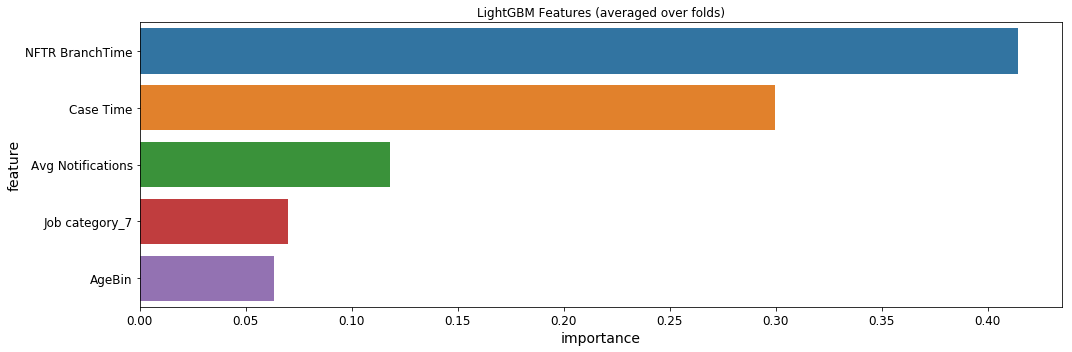

In [172]:
import seaborn as sns
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:5].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(15,5))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()